# HESG Data usage - 5 - weather information

## Introduction

This notebook is part of the HESG Data Usage package. Please refer to the whole repository available here:  
https://gitlab.com/es-catapult-ds/hesg-data-examples

Please refer to this repository for the license, python packages requirement and how to access data.

## Content of this notebook

This notebook shows an example of how access and use the HESG Data to display the observed or forecast weather data for a given house id.

It is assumed that the following files are in the working directory:
- eden1weatherdata.csv
- eden1homedetails.csv

## 1. Import the libraries

In [1]:
# CSV files are loaded with pandas
import pandas as pd

# plotting is done with matplotlib
import matplotlib.pyplot as plt
# this jupyter notebook command enables interactive plotting
%matplotlib notebook
# remove SettingWithCopyWarning warning message to avoid distraction
pd.set_option('mode.chained_assignment', None)

## 2. Load the weather data and the homedetails

The homedetails is needed to find which stationids are relevant for a given house.

In [2]:
df_weather = pd.read_csv("./eden1weatherdata.csv")
# display the content of the table
# for illustration only
df_weather

stationid                     timestamp  \
0        1655735010  2018-12-09 12:00:00.000+0000   
1        1655735010  2018-12-09 15:00:00.000+0000   
2        1655735010  2018-12-09 15:00:00.000+0000   
3        1655735010  2018-12-09 15:00:00.000+0000   
4        1655735010  2018-12-09 15:00:00.000+0000   
...             ...                           ...   
2717116  2085707124  2019-10-04 21:00:00.000+0000   
2717117  2085707124  2019-10-04 21:00:00.000+0000   
2717118  2085707124  2019-10-04 21:00:00.000+0000   
2717119  2085707124  2019-10-04 21:00:00.000+0000   
2717120  2085707124  2019-10-04 21:00:00.000+0000   

                       dateofforecast  dewpoint  feelsliketemperature  \
0        2018-12-09 17:00:00.000+0000       NaN                     6   
1        2018-12-09 17:00:00.000+0000       NaN                     5   
2        2018-12-09 18:00:00.000+0000       NaN                     5   
3        2018-12-09 19:00:00.000+0000       NaN                     5   
4        2018-12-09 20:00:00.000+0000       NaN                     5   
...                               ...       ...                   ...   
2717116  2019-09-30 18:00:00.000+0000       NaN                    10   
2717117  2019-09-30 19:00:00.000+0000       NaN                    10   
2717118  2019-09-30 20:00:00.000+0000       NaN                    10   
2717119  2019-09-30 22:00:00.000+0000       NaN                    10   
2717120  2019-09-30 23:00:00.000+0000       NaN                    10   

         humidity  precipitation  pressure  pressuretendency recordtype  \
0            78.0              1       NaN               NaN   forecast   
1            77.0             40       NaN               NaN   forecast   
2            77.0             40       NaN               NaN   forecast   
3            77.0             40       NaN               NaN   forecast   
4            77.0             40       NaN               NaN   forecast   
...           ...            ...       ...               ...        ...   
2717116      90.0              9       NaN               NaN   forecast   
2717117      91.0              8       NaN               NaN   forecast   
2717118      92.0              8       NaN               NaN   forecast   
2717119      92.0              7       NaN               NaN   forecast   
2717120      92.0              7       NaN               NaN   forecast   

         temperature  uv  visibility winddirection  windgust  windspeed  
0                9.0   1       30000           WNW        20         13  
1                8.0   1       15000           WNW        25         13  
2                8.0   1       15000           WNW        25         13  
3                8.0   1       15000           WNW        25         13  
4                8.0   1       15000           WNW        25         13  
...              ...  ..         ...           ...       ...        ...  
2717116         11.0   0       15000            SE        13          4  
2717117         11.0   0       15000           ENE        13          4  
2717118         11.0   0       15000           ENE        11          4  
2717119         11.0   0       30000            NE        11          4  
2717120         11.0   0       30000            NE        11          4  

[2717121 rows x 16 columns]

There are observation stations (real station with measure instruments)

There are forecast stations (geographical point on the forecast grid)

The MET station id has been changed into a HESG stationid.

In [3]:
# you can find the closest stations of a specific house inside the homedetails table
df_homedetails = pd.read_csv("./eden1homedetails.csv")
# display homedetails
# for illustration only
df_homedetails

houseid  boilermaxoutput  boilerminoutput  electricitymeterinitialreading  \
0       31              NaN              NaN                         1323.78   
1       38              NaN              NaN                         3784.00   
2       24              NaN              NaN                        94779.00   
3       47              NaN              NaN                        40410.00   
4       10              NaN              NaN                             NaN   
5       76              NaN              NaN                            0.00   
6       17              NaN              NaN                            1.00   
7      123              NaN              NaN                         4639.90   
8       63              NaN              NaN                             NaN   

  electricitymeterismetric  electricitymeterpulses  electricitystandingcharge  \
0                     True                  1000.0                     34.000   
1                     True                  1000.0                     18.000   
2                     True                   187.5                     23.500   
3                     True                   187.5                     27.400   
4                      NaN                     NaN                     26.019   
5                     True                     NaN                     18.380   
6                     True                     NaN                     14.090   
7                     True                   200.0                     18.000   
8                     True                     NaN                        NaN   

   electricityunitrate  forecaststationid  gasmeterinitialreading  \
0               78.000          297669287                 647.000   
1               12.720        -1462031104                7258.000   
2               12.500         1965559425               11994.000   
3               11.390         1411239063                9328.000   
4               13.913         -648140277                     NaN   
5               12.249         1153535237                6198.400   
6               14.690          -18667165                   1.000   
7               16.000         -388549811               21545.168   
8                  NaN          297669287                     NaN   

  gasmeterismetric  gasmeterpulses  gasstandingcharge  gasunitrate  \
0             True        100.0000              24.00       34.000   
1             True        100.0000              25.00        2.353   
2             True        100.0000              22.50        2.640   
3            False         35.3147              27.40        2.530   
4              NaN             NaN              31.50        4.358   
5            False         35.3147              14.00        2.516   
6             True        100.0000              14.09        3.650   
7             True        100.0000              31.77        4.030   
8             True        100.0000                NaN          NaN   

  isdecommissioned lastcommissioningstatechanged  latitude  longitude  \
0              NaN                           NaN         0          0   
1              NaN                           NaN         0          0   
2              NaN                           NaN         0          0   
3             True  2019-04-02 12:03:52.000+0000         0          0   
4             True  2018-02-16 13:22:03.000+0000         0          0   
5              NaN                           NaN         0          0   
6              NaN                           NaN         0          0   
7              NaN                           NaN         0          0   
8             True  2018-02-16 13:58:12.000+0000         0          0   

   makemodel  observationstationid  
0        NaN            1655735010  
1        NaN            1655735010  
2        NaN            1655735010  
3        NaN            1655735010  
4        NaN             674341831  
5        NaN            2085707124  
6        

homedetails contains the forecast stationid and the observation station id for a given house

In [4]:
# get the station ids for the house id 47
station_id_f = df_homedetails[df_homedetails["houseid"] == 47]["forecaststationid"].tolist()[0]
station_id_o = df_homedetails[df_homedetails["houseid"] == 47]["observationstationid"].tolist()[0]
station_id_f, station_id_o

(1411239063, 1655735010)

## 3. Observation data

Using the "observation station id", the observation weather data is available

In [5]:
df_weather_o = df_weather[df_weather["stationid"] == station_id_o]
# display the different type of data for this station id
df_weather_o[["recordtype", "stationid"]].groupby("recordtype").count()

stationid
recordtype            
forecast        243630
observation       6754

There are forecast entries for the observation station too

In [6]:
# select the observation data
df_weather_o = df_weather_o[df_weather_o["recordtype"] == "observation"]
# usually timestamp == dateofforecast, but few case and a also have observation of the previous hour
# (probably depending on when exactly the request was done)
df_weather_o = df_weather_o[df_weather_o["timestamp"] == df_weather_o["dateofforecast"]]
# convert timestamp to Datetime
df_weather_o["timestamp"] = pd.to_datetime(df_weather_o["timestamp"])

<IPython.core.display.Javascript object>


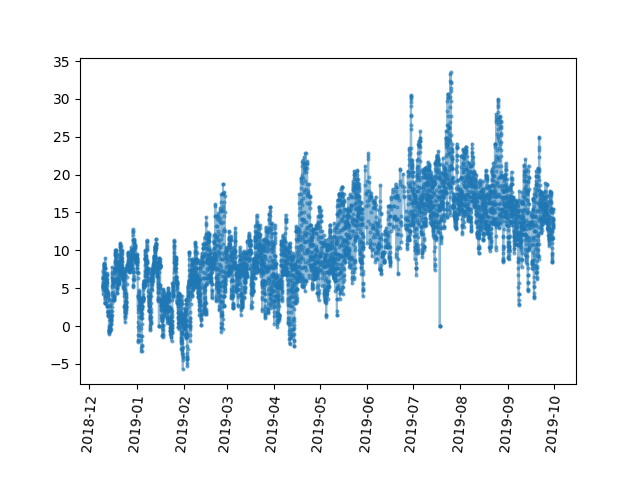

In [7]:
plt.close()
xs = [_.to_pydatetime() for _ in df_weather_o["timestamp"]]
plt.plot(xs, df_weather_o["temperature"], "-o",
         markersize=2, alpha=0.5)
plt.xticks(rotation=85)
plt.subplots_adjust(bottom=0.2)

For some station, it may be missing data, because connection problem, ...

## 4. forecast data

In [8]:
df_weather_f = df_weather[df_weather["stationid"] == station_id_f]
df_weather_f[["recordtype", "stationid"]].groupby("recordtype").count()

stationid
recordtype           
forecast       245763

Unlike observation data, forecast data contains only forecast

In [9]:
df_weather_f["timestamp"] = pd.to_datetime(df_weather_f["timestamp"])
df_weather_f["dateofforecast"] = pd.to_datetime(df_weather_f["dateofforecast"])

Each forecast is a small timeseries of predicted temperature for a given date. There are several forecasts, generated at different hours. Therefore, for a given specific date, you can find several forecasted values, corresponding to different forecast computed at different time.

<IPython.core.display.Javascript object>


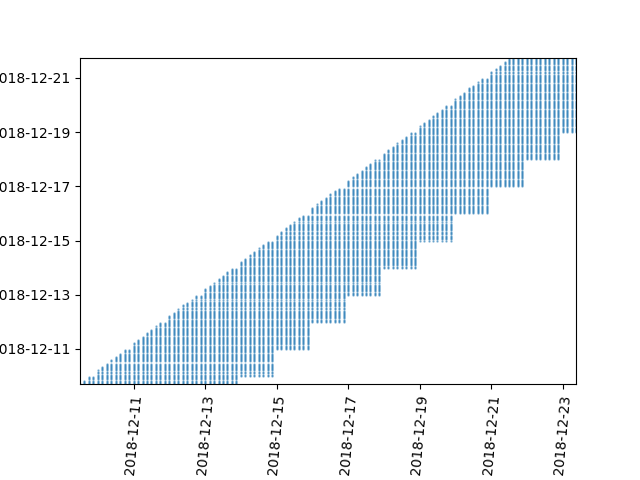

In [10]:
plt.close()
plt.scatter(df_weather_f["timestamp"], df_weather_f["dateofforecast"], s=0.5, alpha=0.5)
# let's zoom in in the first few days
plt.xlim([df_weather_f["timestamp"].min(), df_weather_f["timestamp"].tolist()[10000]])
plt.ylim([df_weather_f["dateofforecast"].min(), df_weather_f["dateofforecast"].tolist()[10000]])
plt.xticks(rotation=85)
plt.subplots_adjust(bottom=0.2)


A forecast is done every hour H (but some are missing), and return the forecast for each hour from H - 5 to trunc(H + 5 days).

It means that for each "dateofforecast" (= time when the forecast is created), there are several rows for different "timestamp" (= time corresponding to the given temperature).

Ten different forecast can be plotted on top of each other.

<IPython.core.display.Javascript object>


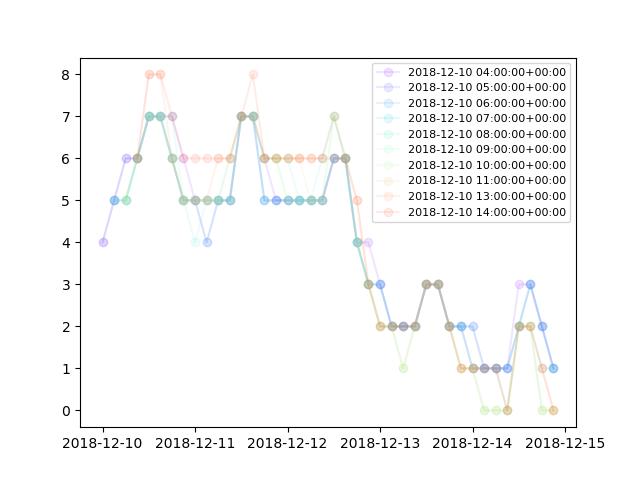

In [11]:
# get 10 forecasts
list_of_forecasttime = df_weather_f["dateofforecast"].drop_duplicates().tolist()[10:20]
list_of_forecasttime.sort()

plt.close()
cmap = plt.get_cmap("rainbow")
for i, forecasttime in enumerate(list_of_forecasttime):
    cdf = df_weather_f[df_weather_f["dateofforecast"] == forecasttime]
    xs = [_.to_pydatetime() for _ in cdf["timestamp"]]
    plt.plot(xs, cdf["temperature"], "-o",
             alpha=0.1, label=str(forecasttime),
             color=cmap(i/len(list_of_forecasttime)))
plt.legend(prop={"size": 8})

As visible, forecasts are not that different from each others.

The forecast values are integer temperature values.